# Insurance Charges Calculator

In [2]:
# Importing the libraries

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor


import joblib as jb





In [3]:
# Importing the data set

data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Identifying data types

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
data.charges.astype

<bound method NDFrame.astype of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64>

In [9]:
data.region.astype

<bound method NDFrame.astype of 0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object>

In [10]:
data.smoker.astype

<bound method NDFrame.astype of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>

In [11]:
data.children.astype

<bound method NDFrame.astype of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>

In [12]:
data.age.astype

<bound method NDFrame.astype of 0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64>

In [13]:
data.bmi.astype

<bound method NDFrame.astype of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64>

### Correlation and Multicollinearity

In [14]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### One Hot Encoding for Object Conversion

In [15]:
data = pd.get_dummies(data, columns=['sex', 'smoker','region'], dtype=int)

In [16]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
data.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [18]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [20]:
data['sex_female'].corr(data['charges'])

np.float64(-0.05729206220202534)

In [21]:
data['region_northeast'].corr(data['charges'])

np.float64(0.0063487712801560655)

In [22]:
data['children'].corr(data['charges'])

np.float64(0.06799822684790487)

In [23]:
data['bmi'].corr(data['charges'])

np.float64(0.1983409688336289)

In [24]:
data['age'].corr(data['charges'])

np.float64(0.29900819333064776)

### Feature and Type Selection

In [25]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [26]:
x = data[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]

y = data['charges']

### Training and Testing the model

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [28]:
x_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [29]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [30]:
x_train.shape

(1070, 11)

In [31]:
x_test.shape

(268, 11)

In [32]:
y_train.shape

(1070,)

In [33]:
y_test.shape

(268,)

### Fittingthe K-Nearest Neighbors Regression

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Fitting the Linear Regression model

In [35]:
l_model = LinearRegression()

l_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Fitting the Random Forest Regressor

In [36]:
r_model = RandomForestRegressor()

r_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Fitting the Support Vector Regressor

In [37]:
from sklearn.svm import SVR


"""kernel → defines how data is mapped (linear, polynomial, RBF).

C → regularization: higher C = tries to fit more closely, lower C = simpler model.

epsilon (ε) → the allowed margin of error around predictions where no penalty is applied.

gamma → how much influence a single training point has (affects curve smoothness)."""

svr_model = SVR(kernel = "rbf", gamma="scale", C=100, epsilon=0.1)

svr_model.fit(x_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### Fitting the Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor


d_model = DecisionTreeRegressor()

d_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### Prediction of KNN Regressor

In [39]:
knn_predict = knn.predict(x_test)

knn_predict

array([ 8312.86098 ,  5104.00873 , 19932.91064 ,  9036.04185 ,
       15352.777566,  6529.731154,  6703.31425 , 14320.10961 ,
        8069.99755 , 11958.197436, 12600.83506 , 13548.15698 ,
       10271.71113 , 24122.8027  , 29564.924988, 16020.70195 ,
       24559.80078 , 32189.610258, 12326.41639 , 12980.32612 ,
        8225.056516,  7871.46558 ,  1707.18536 ,  9623.85306 ,
       12413.456106, 11018.87098 , 20685.149108,  8286.929408,
       12177.6453  ,  7830.4657  ,  7729.76777 , 12095.74982 ,
        7064.83089 ,  9367.38153 ,  2882.80246 , 16802.621192,
        2231.83825 ,  7655.84142 , 21782.608556, 28292.115246,
       10004.054242,  4927.872582, 13645.511402, 12329.48216 ,
        5102.62973 , 12213.46264 ,  7965.989454, 13490.750124,
       18661.073538,  7578.156924, 17655.668242,  3560.273418,
        6152.56761 ,  4655.35675 , 19796.142394, 16214.6307  ,
        3863.96483 ,  8006.3826  , 12077.06829 , 20822.228012,
       13627.02178 ,  5909.492274, 35486.282048, 10128.

### Prediction of Decision Tree Regressor

In [40]:
d_predict = d_model.predict(x_test)

d_predict

array([ 9225.2564  ,  4571.41305 , 28950.4692  ,  9225.2564  ,
       33732.6867  , 11326.71487 ,  2527.81865 , 14410.9321  ,
        2974.126   , 30284.64294 , 19361.9988  ,  6710.1919  ,
        4151.0287  , 46200.9851  , 48173.361   , 48885.13561 ,
       10118.424   , 41676.0811  ,  8232.6388  , 21348.706   ,
        4877.98105 ,  8116.26885 ,  1253.936   ,  2741.948   ,
       10702.6424  , 11512.405   , 13228.84695 ,  4618.0799  ,
        9447.25035 , 16586.49771 ,  7954.517   , 11840.77505 ,
       11482.63485 ,  5425.02335 ,  3410.324   ,  8342.90875 ,
        2007.945   ,  6849.026   , 24667.419   , 37742.5757  ,
        4561.1885  ,  2639.0429  , 10713.644   , 12523.6048  ,
        5124.1887  , 12913.9924  , 26018.95052 ,  4877.98105 ,
       40273.6455  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6393.60345 ,  1708.0014  , 20781.48892 ,  9964.06    ,
        3268.84665 , 58571.07448 , 10704.47    , 11512.405   ,
       13462.52    ,  4949.7587  , 15170.069   ,  7201.

### Prediction of Linear Regression

In [41]:
predict = l_model.predict(x_test)

predict

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

### Prediction of Random Forest Regression

In [42]:
predict_val = r_model.predict(x_test)

predict_val

array([ 9960.3246862 ,  4997.4251185 , 28469.6512589 , 11504.4623273 ,
       34949.2647486 ,  9388.6201696 ,  2347.3788074 , 14728.3430539 ,
        6172.2835883 , 10839.0697903 , 19672.6561344 ,  6976.5060975 ,
        4766.0186443 , 46242.4969386 , 48551.2617659 , 45205.3772951 ,
        9985.4818961 , 43136.9010838 ,  8822.2614453 , 24278.4037827 ,
        5666.0280771 ,  9196.9331406 ,  1343.2972765 ,  2992.596433  ,
       11781.7436196 , 11692.0198163 , 13276.6895222 ,  5345.8448796 ,
        9941.9293222 ,  3938.64251427,  7706.801007  , 11702.1490735 ,
        4140.2907298 ,  5802.9160576 ,  3552.4914118 , 11398.8797881 ,
        3023.8304174 ,  7441.658116  , 23649.6331035 , 39770.4782858 ,
        6590.6724736 ,  2824.369635  , 12936.3775153 , 15620.4174199 ,
        5889.3970229 , 15926.2499488 , 19211.5964587 ,  5744.6972507 ,
       42054.0909357 ,  6395.1747594 , 13982.3003131 ,  2347.12783378,
        6821.4925353 ,  1747.0702645 , 12865.7961271 , 10592.4358632 ,
      

### Prediction of  SVR

In [43]:
svr_predict = svr_model.predict(x_test)

svr_predict

array([ 8735.49503655,  6247.52672184, 13069.14759373,  9039.80229277,
        2966.31757083,  6006.73985579,  3009.18802001, 13026.93930238,
        4564.36403069,  9880.005021  ,  4952.58351205,  7664.97651825,
        4609.6292452 ,  9136.48947317, 12286.32510826,  9373.6347478 ,
        9840.23144865,  9346.97506125,  8994.25950529,  8157.58478431,
        4033.5440715 ,  8227.63426115,  2911.69099255,  3559.89092301,
       10145.40822723, 11089.52103746, 12385.81687572,  4288.77496657,
        9295.37914167,  2800.84871806,  7463.77985565, 11779.48378468,
        3241.56230616,  4997.78190589,  4004.02577151,  8743.86400959,
        3208.42281839,  8177.45361171, 10558.33348682,  6367.07529796,
        3115.97596035,  3349.32409496, 11574.3019669 , 12109.61752133,
        5631.42314106, 12181.3490021 ,  3284.79698615,  3938.11545283,
        8324.37452362,  5228.1065319 , 12906.94577807,  2828.94067898,
        7473.42680163,  2822.46829443, 11543.18477939, 10138.59474713,
      

### Prediction of Decision Tree Regressor

In [44]:
d_predict = d_model.predict(x_test)

d_predict

array([ 9225.2564  ,  4571.41305 , 28950.4692  ,  9225.2564  ,
       33732.6867  , 11326.71487 ,  2527.81865 , 14410.9321  ,
        2974.126   , 30284.64294 , 19361.9988  ,  6710.1919  ,
        4151.0287  , 46200.9851  , 48173.361   , 48885.13561 ,
       10118.424   , 41676.0811  ,  8232.6388  , 21348.706   ,
        4877.98105 ,  8116.26885 ,  1253.936   ,  2741.948   ,
       10702.6424  , 11512.405   , 13228.84695 ,  4618.0799  ,
        9447.25035 , 16586.49771 ,  7954.517   , 11840.77505 ,
       11482.63485 ,  5425.02335 ,  3410.324   ,  8342.90875 ,
        2007.945   ,  6849.026   , 24667.419   , 37742.5757  ,
        4561.1885  ,  2639.0429  , 10713.644   , 12523.6048  ,
        5124.1887  , 12913.9924  , 26018.95052 ,  4877.98105 ,
       40273.6455  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6393.60345 ,  1708.0014  , 20781.48892 ,  9964.06    ,
        3268.84665 , 58571.07448 , 10704.47    , 11512.405   ,
       13462.52    ,  4949.7587  , 15170.069   ,  7201.

### Evaluation of KNN Regressor

In [45]:
mae = mean_absolute_error(y_test, knn_predict)

mae

6683.390927511195

In [46]:
mse = mean_squared_error(y_test, knn_predict)

mse

109096152.40856743

In [47]:
mape = mean_absolute_percentage_error(y_test, knn_predict)

print(f"The error percentage is {mape:.2%}")

The error percentage is 73.96%


### Evaluation of Decision Tree Regressor

In [48]:
mae = mean_absolute_error(y_test, d_predict)

mae

3081.470771067164

In [49]:
mse = mean_squared_error(y_test, d_predict)

mse

42631171.12439939

In [50]:
mape = mean_absolute_percentage_error(y_test, d_predict)

print(f"The error percentage is:{mape:.2%}")

The error percentage is:40.45%


### Evaluation of Linear Regression

In [51]:
mae = mean_absolute_error(y_test, predict)

mae






4181.194473753645

In [52]:
mse = mean_squared_error(y_test, predict)

mse

33596915.85136147

In [53]:
mape = mean_absolute_percentage_error(y_test, predict)

print(f"The error % is: {mape:.2%}")

The error % is: 46.89%


### Evaluation of Random Regressor

In [54]:
mae = mean_absolute_error(y_test, predict_val)

mae

2554.8817714172587

In [55]:
mse = mean_squared_error(y_test, predict_val)

mse

21392676.5023268

In [56]:
mape = mean_absolute_percentage_error(y_test, predict_val)

print(f"The error percentage is: {mape:.2%}")

The error percentage is: 30.89%


### Evaluation of SVR

In [57]:
mse = mean_squared_error(y_test, svr_predict)

mse

168757232.41789168

In [58]:
mae = mean_absolute_error(y_test, svr_predict)


mae

6660.398961282005

In [59]:
mape = mean_absolute_percentage_error(y_test, svr_predict)

print(f"The error in this model is: {mape:.2%}")

The error in this model is: 36.08%


### Representation of Trained Models

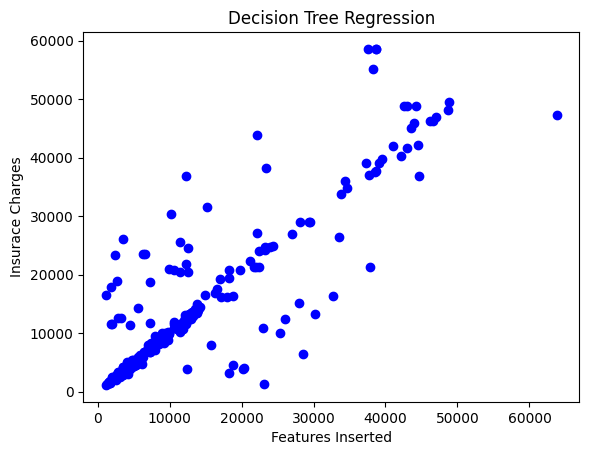

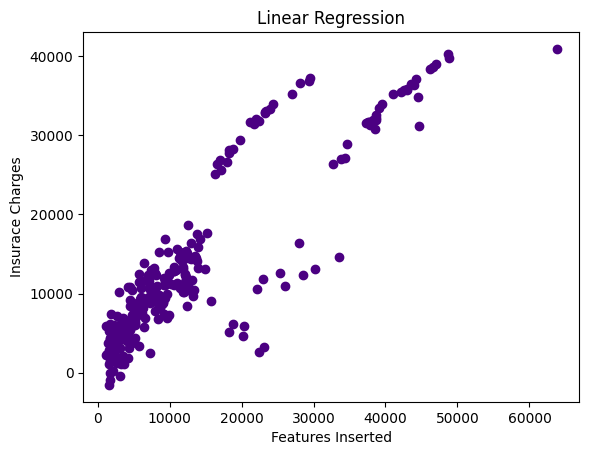

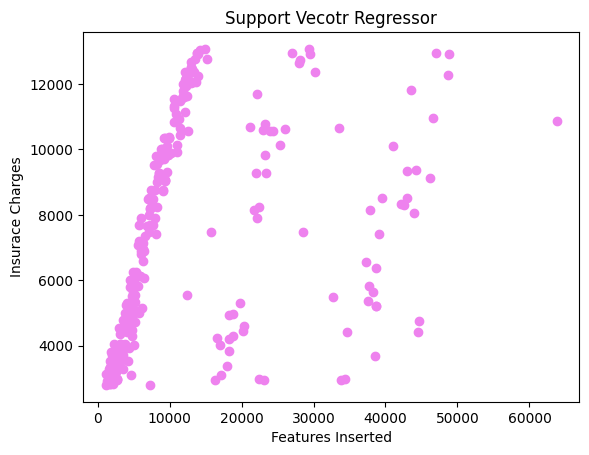

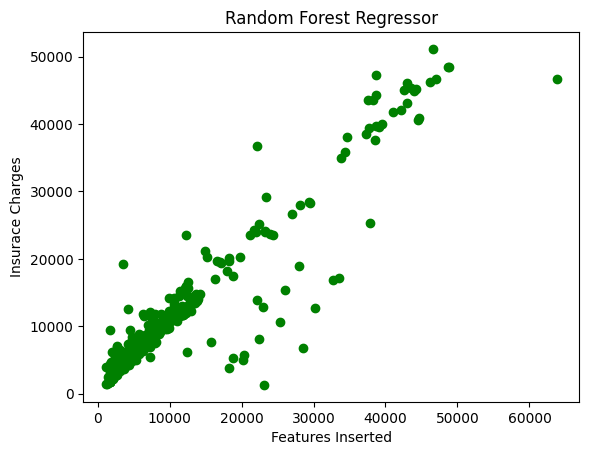

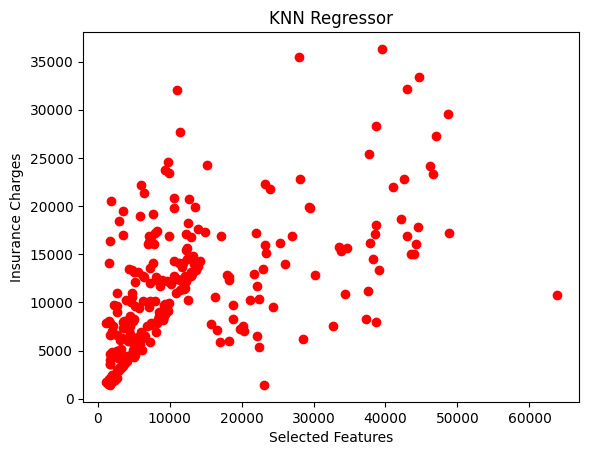

In [60]:
import matplotlib.pyplot as plt

import seaborn as sbn

# For Decision Tree Regressor
plt.title("Decision Tree Regression")
plt.scatter(y_test, d_predict, color='blue')
plt.xlabel("Features Inserted")
plt.ylabel("Insurace Charges")
plt.show()


# For Linear  Regressor
plt.title("Linear Regression")
plt.scatter(y_test, predict, color='indigo')
plt.xlabel("Features Inserted")
plt.ylabel("Insurace Charges")
plt.show()

# For Support Vector Machine
plt.title("Support Vecotr Regressor")
plt.scatter(y_test, svr_predict, color = 'violet')
plt.xlabel("Features Inserted")
plt.ylabel("Insurace Charges")
plt.show()

# For Random Forest Regressor
plt.title("Random Forest Regressor")
plt.scatter(y_test, predict_val, color='green')
plt.xlabel("Features Inserted")
plt.ylabel("Insurace Charges")
plt.show()

# For KNN Regressor
plt.title("KNN Regressor")
plt.scatter(y_test, knn_predict,color='red')
plt.xlabel("Selected Features")
plt.ylabel("Insurance Charges")
plt.show()